# Machine-Learning Pipeline Attempt

In [63]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split

In [97]:
# Read data
bionic_features = pd.read_csv('../bionic/filtered_features_features.tsv', sep='\t', index_col=0)

In [98]:
bionic_features

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
255020_at,0.006137,0.001634,0.015666,-0.011070,-0.006525,0.001425,0.004815,0.013725,-0.007116,-0.014894,...,0.008545,-0.014581,0.011937,0.002172,0.005841,-0.015321,0.003685,-0.000134,0.013399,-0.000274
AAE15,0.005595,-0.001737,0.017635,0.011931,-0.001142,-0.011444,0.009960,0.023475,-0.014202,-0.001902,...,-0.004207,-0.011734,0.003340,0.011178,0.008647,-0.008455,0.004600,-0.009070,0.007584,0.006444
AAPT1,-0.010231,0.008713,0.017250,0.012371,-0.008704,-0.003219,0.011584,0.005346,-0.006709,0.010137,...,0.010933,0.006828,0.006921,0.000502,0.008607,-0.022999,-0.005908,-0.012064,-0.013018,0.002799
ABCB16,-0.000589,0.006413,-0.000917,-0.004738,0.013175,0.000094,0.016572,-0.007545,0.006751,-0.007201,...,-0.004534,-0.000902,0.009234,0.004349,0.012838,-0.025397,-0.013652,-0.019742,-0.023838,-0.010321
ABCB27,0.000462,0.004250,0.005227,0.002572,0.005916,0.010794,0.007978,0.028016,-0.006416,-0.002628,...,-0.000079,-0.003754,0.012829,-0.007166,0.006382,-0.027198,-0.005353,-0.003385,0.010886,-0.000633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mtHsc70-1,0.017697,0.004365,0.001417,0.014903,0.005085,0.009942,-0.001397,-0.004702,-0.002888,0.004578,...,0.003375,0.006308,0.002108,0.005974,0.008432,-0.020286,-0.008781,-0.004645,-0.008232,0.007452
rps15ae,-0.002487,0.011186,0.022498,0.011639,-0.005107,-0.000038,0.017459,0.019180,-0.005888,-0.006553,...,-0.001264,-0.007723,0.001016,-0.002208,0.004135,-0.015752,0.006660,-0.001077,0.009422,0.020152
scpl41,-0.008065,0.000023,0.009985,0.008567,0.005502,0.013875,-0.000799,0.024787,-0.008723,0.004017,...,-0.012011,-0.018653,0.024659,-0.005311,-0.007787,-0.018543,0.012934,-0.009846,0.006114,0.010643
scpl47,0.003512,-0.011788,0.007700,-0.007222,0.001881,0.004719,-0.002367,0.029616,0.002865,-0.003689,...,-0.000743,-0.011381,-0.003993,0.005425,0.002318,-0.026033,0.007014,-0.004767,0.001785,0.018446


## Agglomerative Clustering approaches

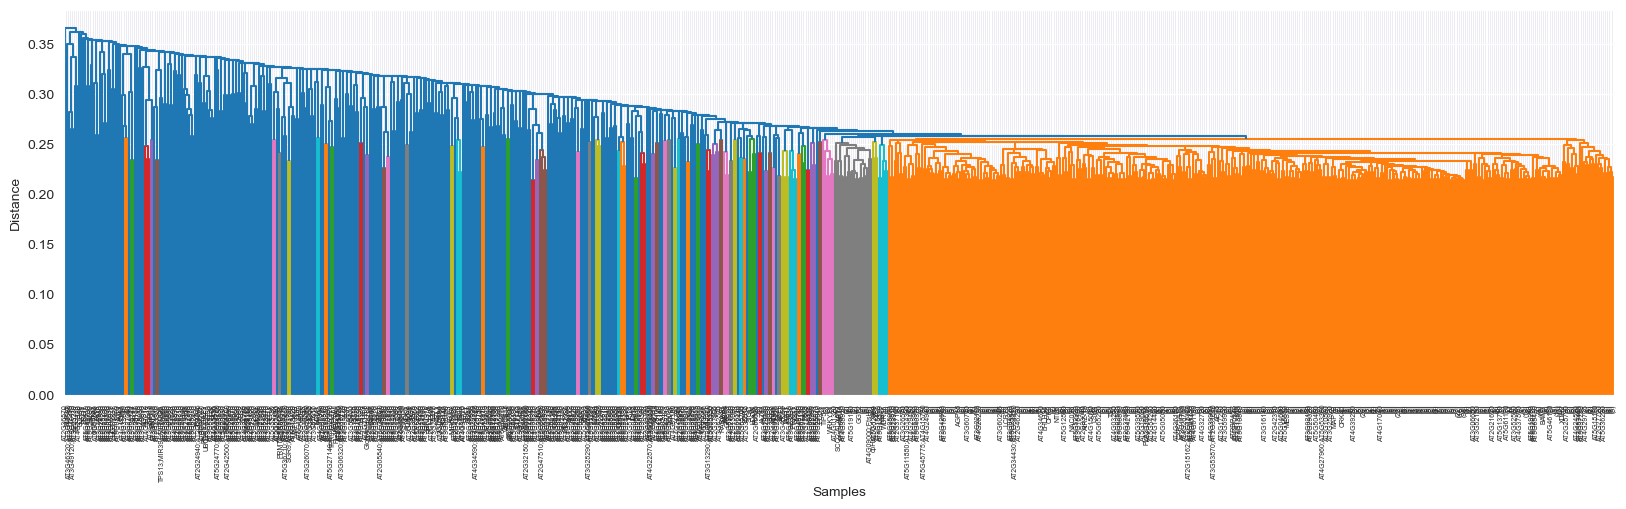

In [15]:
# Perform hierarchical clustering

linkage_matrix = linkage(bionic_features.values, method='average', metric='euclidean')

# Plot a dendrogram to visualize the clustering
plt.figure(figsize=(20, 5))
dendrogram(linkage_matrix, labels=bionic_features.index)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### K-means clustering

C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

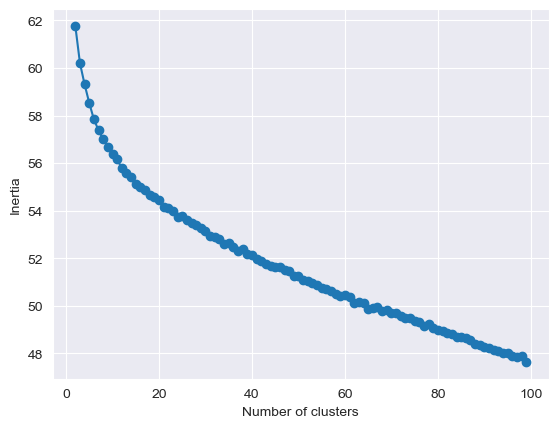

In [41]:
# Determine the optimal number of clusters using the elbow method
inertias = []
silhouette_scores = []
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bionic_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(bionic_features, kmeans.labels_))

plt.plot(range(2, 100), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
# Train a k-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(bionic_features)

C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=16, random_state=42)

In [43]:
kmeans_cluster_labels = kmeans.labels_
kmeans_cluster_labels

array([12, 12, 14, ..., 13, 15, 11])

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bionic_features)

In [65]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_pca)
bionic_features['cluster'] = pd.Series(kmeans.labels_)

C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaca\anaconda3\envs\module-dection\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


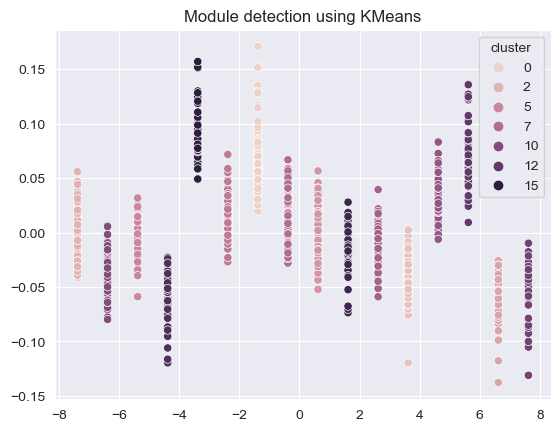

In [67]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', data=bionic_features)
plt.title('Module detection using KMeans')
plt.show()

## Machine Learning